In [26]:
import os 
import numpy as np
import pandas as pd
import warnings
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [ ]:
def data_segmentation(df, y_label, window_size = 100, stride = 50):
    j = df.columns.get_loc(y_label)
    data = df.to_numpy()
    n = len(data)
    X = []
    y = []
    start = 0
    end = 0
    
    while start <= n - window_size:
        end = start + window_size - 1
        if data[start][j] == data[end][j] and data[start][0] + 0.01 > data[end][0]:
            X.append(data[start:(end+1),1:-7])
            y.append(data[start][j])
            start += stride
        else:
            while start + window_size - 1 < n:
                if data[start][j] != data[start+1][j]:
                    break
                start += 1
            start += 1
    return np.asarray(X), np.asarray(y)

In [ ]:
# def dim_reduction(data, n):
#     pca = PCA(n_components = n)
#     reduced_data = pca.fit_transform(data)
#     columns_name = [f'column{i}' for i in range(1, n+1)]
#     return pd.DataFrame(reduced_data, columns = columns_name)

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [8]:
print(df_test["Locomotion"].value_counts())
print(df_test["HL_Activity"].value_counts())

Locomotion
1    76362
0    45745
2    41508
4    23749
5     5310
Name: count, dtype: int64
HL_Activity
0      81030
105    34495
103    26659
104    26560
102    16179
101     7751
Name: count, dtype: int64


The response variables in test data are quite imbalanced. 

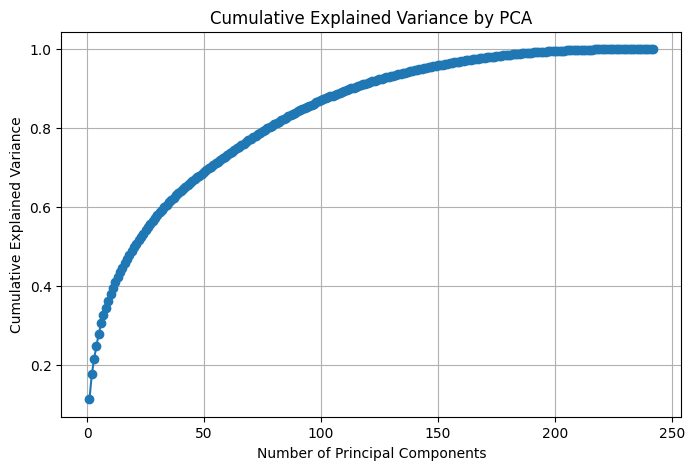

In [33]:
X_train = df_train.iloc[:,1:-7]
pca = PCA()
X_red = pca.fit_transform(X_train)
explained = pca.explained_variance_ratio_
cum_exp = np.cumsum(explained)
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cum_exp)+1), cum_exp, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by PCA")
plt.grid(True)
plt.show()

In [38]:
threshold = 0.7
n_components = np.argmax(cum_exp >= threshold) + 1
n_components


np.int64(53)